## File

1. train_ratings.csv
2. directors.tsv
3. genres.tsv
4. titles.tsv
5. writers.tsv
6. years.tsv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_path = './data/train/'

### train_ratings.csv

In [3]:
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [4]:
train_df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [5]:
# NULL 확인
print('NULL 확인')
print(train_df.isnull().sum())
print('---------------------------------------')
# Shape: (5154471, 3)
print('Shape 확인')
print(train_df.shape)
print('---------------------------------------')
# unique 확인
print('unique 확인')
print(f"user: {train_df['user'].unique()[:10]}")
print(f"item: {train_df['item'].unique()[:10]}")
print(f"time: {train_df['time'].unique()[:10]}")
print('---------------------------------------')
# unique 확인
print('nunique 확인')
print(f"user: {train_df['user'].nunique()}")
print(f"item: {train_df['item'].nunique()}")
print(f"time: {train_df['time'].nunique()}")

NULL 확인
user    0
item    0
time    0
dtype: int64
---------------------------------------
Shape 확인
(5154471, 3)
---------------------------------------
unique 확인
user: [11 14 18 25 31 35 43 50 58 60]
item: [4643  170  531  616 2140 2722 2313 2688 2428 3113]
time: [1230782529 1230782534 1230782539 1230782542 1230782563 1230782583
 1230782646 1230782656 1230782694 1230782719]
---------------------------------------
nunique 확인
user: 31360
item: 6807
time: 5074973


### directors.tsv

- 한 감독이 여러 작품을 할 수 있으므로, 행 개수와 director의 unique값이 상이하다.
- 감독 정보가 없는 작품이 꽤 있음 (6807 - 5905 = 902개)

In [6]:
directors_df = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


In [7]:
directors_df.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [8]:
# NULL 확인: 없음
print('NULL 확인')
print(directors_df.isnull().sum())
print('---------------------------------------')
# Shape: (5905, 2)
print('Shape 확인')
print(directors_df.shape)
print('---------------------------------------')
# unique 확인
print('unique 확인')
print(f"item: {directors_df['item'].unique()[:10]}")
print(f"director: {directors_df['director'].unique()[:10]}")
print('---------------------------------------')
# unique 확인
print('nunique 확인')
print(f"item: {directors_df['item'].nunique()}")
print(f"director: {directors_df['director'].nunique()}")

NULL 확인
item        0
director    0
dtype: int64
---------------------------------------
Shape 확인
(5905, 2)
---------------------------------------
unique 확인
item: [1237 5147 7327 2068 7396 7820 4422 7939 7938 7941]
director: ['nm0000005' 'nm0000019' 'nm0000033' 'nm0000036' 'nm0000037' 'nm0000040'
 'nm0000041' 'nm0000045' 'nm0000059' 'nm0000076']
---------------------------------------
nunique 확인
item: 5503
director: 1340


### genres.tsv

- 한 장르에 여러 작품이 포함될 수 있으므로, 행 개수와 genre의 unique값이 상이하다.
- 작가명 모두 'nm'으로 시작

In [9]:
genres_df = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


In [10]:
genres_df.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [11]:
# NULL 확인: 없음
print('NULL 확인')
print(genres_df.isnull().sum())
print('---------------------------------------')
# Shape: (15933, 2)
print('Shape 확인')
print(genres_df.shape)
print('---------------------------------------')
# unique 확인
print('unique 확인')
print(f"item: {genres_df['item'].unique()[:10]}")
print(f"genre: {genres_df['genre'].unique()[:10]}")
print('---------------------------------------')
# unique 확인
print('nunique 확인')
print(f"item: {genres_df['item'].nunique()}")
print(f"genre: {genres_df['genre'].nunique()}")

NULL 확인
item     0
genre    0
dtype: int64
---------------------------------------
Shape 확인
(15933, 2)
---------------------------------------
unique 확인
item: [ 318 2571 2959  296  356 4993 7153 5952  593 2858]
genre: ['Crime' 'Drama' 'Action' 'Sci-Fi' 'Thriller' 'Comedy' 'Romance' 'War'
 'Adventure' 'Fantasy']
---------------------------------------
nunique 확인
item: 6807
genre: 18


### titles.tsv

- item은 다른데 title은 동일한 중복 타이틀 1개 존재 "War of the Worlds (2005)"

In [12]:
titles_df = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


In [13]:
titles_df.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [14]:
# NULL 확인: 없음
print('NULL 확인')
print(titles_df.isnull().sum())
print('---------------------------------------')
# Shape: (6807, 2)
print('Shape 확인')
print(titles_df.shape)
print('---------------------------------------')
# unique 확인
print('unique 확인')
print(f"item: {titles_df['item'].unique()[:10]}")
print(f"title: {titles_df['title'].unique()[:10]}")
print('---------------------------------------')
# unique 확인
print('nunique 확인')
print(f"item: {titles_df['item'].nunique()}")
print(f"title: {titles_df['title'].nunique()}")

NULL 확인
item     0
title    0
dtype: int64
---------------------------------------
Shape 확인
(6807, 2)
---------------------------------------
unique 확인
item: [ 318 2571 2959  296  356 4993 7153 5952  593 2858]
title: ['Shawshank Redemption, The (1994)' 'Matrix, The (1999)'
 'Fight Club (1999)' 'Pulp Fiction (1994)' 'Forrest Gump (1994)'
 'Lord of the Rings: The Fellowship of the Ring, The (2001)'
 'Lord of the Rings: The Return of the King, The (2003)'
 'Lord of the Rings: The Two Towers, The (2002)'
 'Silence of the Lambs, The (1991)' 'American Beauty (1999)']
---------------------------------------
nunique 확인
item: 6807
title: 6806


In [15]:
titles_df[titles_df['title'].duplicated(keep=False)]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


### writers.tsv

- 작가 정보가 없는 작품이 꽤 있음 (6807 - 5648 = 1157개)
- 연도는 '1922년'부터 '2014년'까지 존재
- 2000년대 전후로 대부분의 작품이 몰려있음

In [16]:
writers_df = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
writers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


In [19]:
writers_df.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [21]:
# NULL 확인: 없음
print('NULL 확인')
print(writers_df.isnull().sum())
print('---------------------------------------')
# Shape: (11306, 2)
print('Shape 확인')
print(writers_df.shape)
print('---------------------------------------')
# unique 확인
print('unique 확인')
print(f"item: {writers_df['item'].unique()[:10]}")
print(f"writer: {writers_df['writer'].unique()[:10]}")
print('---------------------------------------')
# unique 확인
print('nunique 확인')
print(f"item: {writers_df['item'].nunique()}")
print(f"writer: {writers_df['writer'].nunique()}")

NULL 확인
item      0
writer    0
dtype: int64
---------------------------------------
Shape 확인
(11306, 2)
---------------------------------------
unique 확인
item: [1237 5147 7327 2068 7396 4422 7939 7938 7941 7937]
writer: ['nm0000005' 'nm0000019' 'nm0000033' 'nm0000036' 'nm0000040' 'nm0000041'
 'nm0000045' 'nm0000059' 'nm0000076' 'nm0000080']
---------------------------------------
nunique 확인
item: 5648
writer: 2989


In [25]:
# 작가명 모두 'nm'으로 시작
writers_df['writer'].str[:2].unique()

array(['nm'], dtype=object)

### years.tsv

- 연도 정보가 없는 작품이 극소수 있음 (6807 - 6799 = 8개)

In [31]:
years_df = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
years_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


In [32]:
years_df.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [33]:
# NULL 확인: 없음
print('NULL 확인')
print(years_df.isnull().sum())
print('---------------------------------------')
# Shape: (6799, 2)
print('Shape 확인')
print(years_df.shape)
print('---------------------------------------')
# unique 확인
print('unique 확인')
print(f"item: {years_df['item'].unique()[:10]}")
print(f"year: {years_df['year'].unique()[:10]}")
print('---------------------------------------')
# unique 확인
print('nunique 확인')
print(f"item: {years_df['item'].nunique()}")
print(f"year: {years_df['year'].nunique()}")

NULL 확인
item    0
year    0
dtype: int64
---------------------------------------
Shape 확인
(6799, 2)
---------------------------------------
unique 확인
item: [ 1348 44587  4768  8235  8609 25750 25753  4405  7074  7302]
year: [1922 1923 1924 1925 1926 1927 1928 1929 1930 1931]
---------------------------------------
nunique 확인
item: 6799
year: 93


In [38]:
print(f"연도는 '{years_df['year'].min()}년'부터 '{years_df['year'].max()}년'까지 존재")


연도는 '1922년'부터 '2014년'까지 존재


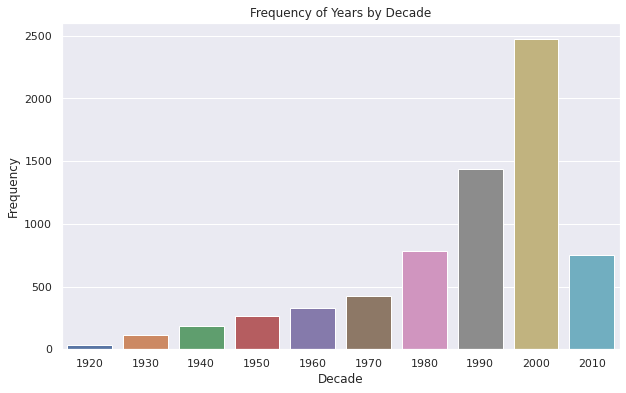

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=years_df, x=(years_df['year'] // 10) * 10)
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.title('Frequency of Years by Decade')
plt.show()